In [1]:


import time
import re
import pylab as pl
import numpy as np

from datetime import datetime, timedelta

import subprocess

import os
import time
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

from joblib import Parallel, delayed
import time
import numpy as np
import shutil


In [2]:
%config NotebookApp.iopub_data_rate_limit=10000000000

In [3]:

def str2datetime(s):
    parts = s.split('.')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S")
    return dt.replace(microsecond=int(parts[1]))


def remove_outliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    removedList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        else:
            removedList.append(y)
    return (resultList, removedList)
def getThroughput(experiment):

    result = subprocess.check_output('cat '+experiment+'/nohup_client_*', shell=True)
#     print(result)

    result = result.decode("utf-8") 

    lines = result.split('\n')

    commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
#     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            try:
#                 print(line)

                time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
                float((line.split(' ')[1]).split(':')[2])
    
#                 print(time_item)
                Times.append(time_item)        

                lats.append(float(m.group(2)))
            except:
                continue


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    Times.sort()
    
#     print(Times)

    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            
            print(next_begin_time)
            
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)

#     lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats


In [4]:
with open('all_local_ips','r') as firstfile:
    for line in firstfile:
        print(line)


127.0.0.1

127.0.0.1

127.0.0.1

127.0.0.1

127.0.0.1


In [5]:
with open('all_local_ips','r') as firstfile, open('all_external_ips','w') as secondfile:
      
    # read content from first file
    for line in firstfile:
        print(line)

        secondfile.write(line)
        
        
with open('all_local_ips','r') as firstfile, open('all_internal_ips','w') as secondfile:
      
    # read content from first file
    for line in firstfile:

        secondfile.write(line)

127.0.0.1

127.0.0.1

127.0.0.1

127.0.0.1

127.0.0.1


In [6]:
import subprocess

In [7]:
nclients = 1
nnodes = 4

In [8]:
f = open('all_external_ips', "r")
data1 = [line.strip() for line in f.readlines()]

In [9]:
f = open('all_internal_ips', "r")
data2 = [line.strip() for line in f.readlines()]

In [10]:
data2, len(data2)

(['127.0.0.1', '127.0.0.1', '127.0.0.1', '127.0.0.1', '127.0.0.1'], 5)

In [11]:
data = []

In [12]:
# for i in range(len(data1)):
#     if data1[i]!='None':
# #         data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')
    

skip_instances = 0
    
for i in range(skip_instances, len(data1)):
    if data1[i]!='None':
        data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')

In [13]:
data, len(data)

(['127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1'],
 5)

In [14]:
with open('replicas.txt', 'w') as f:
    for line in data[:nnodes]:
        f.write("%s\n" % line)

In [15]:
data, len(data)

(['127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1'],
 5)

In [16]:
nclients

1

In [17]:
with open('clients.txt', 'w') as f:
    for line in data[nnodes:]:
        f.write("127.0.0.1\n")       

In [18]:
with open('all_external_ips') as f:
    lines = f.read().splitlines()


lines = [x for x in lines if x!='None']
lines


['127.0.0.1', '127.0.0.1', '127.0.0.1', '127.0.0.1', '127.0.0.1']

In [19]:
len(lines)

5

In [20]:
experiment = '../temp'

In [21]:
os.system('cd ../temp; echo 3108 | sudo -S  rm *')

[sudo] password for tejas: 

0

In [22]:
node_list = list(range(len(lines)))

node_list_server = node_list[:nnodes]
node_list_client = node_list[-nclients:]

node_list_server, node_list_client


([0, 1, 2, 3], [4])

In [23]:
nnodes

4

In [24]:
os.system('echo 3108 | sudo -S killall hotstuff-app')
os.system('echo 3108 | sudo -S killall hotstuff-client')
os.system('echo 3108 | sudo -S killall nohup')


[sudo] password for tejas: hotstuff-app: no process found
[sudo] password for tejas: hotstuff-client: no process found
[sudo] password for tejas: nohup: no process found


256

In [25]:
os.system('echo 3108 | sudo -S sh job_mini.sh '+ experiment)

[sudo] password for tejas: CMake Warning:
  No source or binary directory provided.  Both will be assumed to be the
  same as the current working directory, but note that this warning will
  become a fatal error in future CMake releases.




Name of TestRun: ../temp
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found suitable version "3.0.13", minimum required is "1.1.0")  
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found version "3.0.13")  
-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
-- Configuring done (0.1s)
-- Generating done (0.0s)
-- Build files have been written to: /home/tejas/work/O2PRBC
[ 21%] Built target libsecp256k1
[ 37%] Built target hotstuff
[ 62%] Built target salticidae
[ 64%] Built target salticidae_shared
[ 67%] Built target salticidae_static
[ 70%] Built target hotstuff_static
[ 72%] Built target hotstuff_shared
[ 78%] Built target hotstuff-keygen
[ 83%] Built target test_secp256k1
[ 94%] Built target hotstuff-app
[ 94%] Built target hotstuff-tls-keygen
[100%] Built target hotstuff-client


0

In [26]:
        
def run_node(i):
    ip = lines[i]
#     if ip!='None' and( ip in nodeIps[:-3]):
    if ip!='None' and ip in lines[:nnodes]:

        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf > ../temp/nohup_'+str(i)+'.out 2>&1 &'

        print(command)
        os.system(command)
        
        





results = Parallel(n_jobs=len(lines))(delayed(run_node)(i) for i in [0,1,2,3])

print(results)


time.sleep(10)

[None, None, None, None]


In [27]:
def run_client(i):
    ip = lines[i]
    client_no = i - nnodes
    if ip!='None' and( ip in lines[nnodes:]):
        
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 1 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'
        
        print(command)
        os.system(command)



results = Parallel(n_jobs=len(lines))(delayed(run_client)(i) for i in [4])

time.sleep(40)
# os.system('echo 3108 | sudo -S killall hotstuff-client')


# def run_client(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 1 > ../temp/nohup_client_'+str(i+1)+'.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
# time.sleep(20)
# results = Parallel(n_jobs=len(lines))(delayed(run_client)(i) for i in [4])
# time.sleep(40)


In [28]:
def kill_node(node_number):
    # Command to find the process running the node
    command = f"ps aux | grep 'hotstuff.gen-sec{node_number}.conf' | grep -v grep"
    process = subprocess.run(command, shell=True, capture_output=True, text=True)

    if process.stdout.strip():
        # Extract the PID (assumes PID is the second column)
        pid = process.stdout.split()[1]
        print(f"Killing process {pid} for node {node_number}")
        os.system(f"kill {pid}")
    else:
        print(f"No process found for node {node_number}")

In [29]:
# kill_node(4)

In [30]:
# results = Parallel(n_jobs=len(lines))(delayed(run_node)(i) for i in [4])

# print(results)

In [31]:
# def run_client(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter 1 --max-async 1 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'
        
#         print(command)
#         os.system(command)



# results = Parallel(n_jobs=len(lines))(delayed(run_client)(i) for i in [5])

# time.sleep(5)


In [32]:
# time.sleep(35)

In [33]:
os.system('echo 3108 | sudo -S killall hotstuff-client')


os.system('echo 3108 | sudo -S killall hotstuff-app')
os.system('echo 3108 | sudo -S killall nohup')

[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: nohup: no process found


256

In [34]:
time.sleep(5)

In [35]:
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

16298.207214
16299.207214
16300.207214
16301.207214
16302.207214
16303.207214
16304.207214
16305.207214
16306.207214
16307.207214
16308.207214
16309.207214
16310.207214
16311.207214
16312.207214
16313.207214
16314.207214
16315.207214
16316.207214
16317.207214
16318.207214
16319.207214
16320.207214
16321.207214
16322.207214
16323.207214
16324.207214
16325.207214
16326.207214
16327.207214
16328.207214
16329.207214
16330.207214
16331.207214
16332.207214
16333.207214
16334.207214
16335.207214
16336.207214
16337.207214
136.4878048780488 0.0069597780557541095


In [36]:
X,Y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 array([136., 160., 172., 137., 167., 166., 140.,  86., 114., 161., 143.,
        144., 153., 125., 159., 143., 136.,  98., 140., 166., 155., 148.,
        105., 126., 141., 131., 130., 147., 108., 167., 146., 149., 160.,
        132., 165., 156., 132.,  79.,  96., 152.,  25.]))

In [37]:
lats

[0.004919,
 0.004888,
 0.005119,
 0.004931,
 0.005418,
 0.005437,
 0.00519,
 0.005395,
 0.005425,
 0.004804,
 0.005268,
 0.005501,
 0.005274,
 0.005026,
 0.005609,
 0.00594,
 0.00585,
 0.005921,
 0.005582,
 0.005248,
 0.005468,
 0.005474,
 0.005483,
 0.005085,
 0.005458,
 0.006009,
 0.007162,
 0.006561,
 0.006242,
 0.007809,
 0.011134,
 0.01036,
 0.012661,
 0.01263,
 0.014461,
 0.01015,
 0.009574,
 0.006011,
 0.013972,
 0.005253,
 0.005382,
 0.006318,
 0.005792,
 0.005359,
 0.004552,
 0.005216,
 0.005525,
 0.005467,
 0.005869,
 0.005973,
 0.005435,
 0.007168,
 0.007549,
 0.011254,
 0.009063,
 0.005682,
 0.006748,
 0.005733,
 0.006426,
 0.004646,
 0.008423,
 0.006697,
 0.007448,
 0.00636,
 0.007259,
 0.007794,
 0.007573,
 0.005467,
 0.007221,
 0.005013,
 0.007453,
 0.005149,
 0.006626,
 0.005732,
 0.007479,
 0.006456,
 0.010341,
 0.007977,
 0.010457,
 0.008709,
 0.006305,
 0.008241,
 0.006699,
 0.004611,
 0.007979,
 0.006514,
 0.004885,
 0.004848,
 0.006468,
 0.0062,
 0.005514,
 0.00524

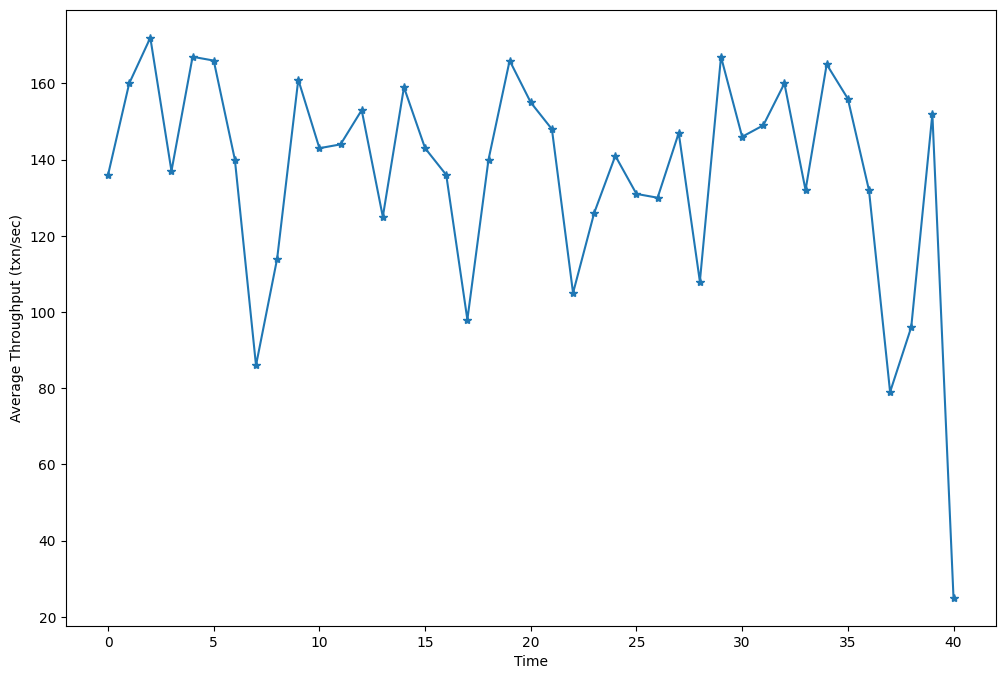

<Figure size 640x480 with 0 Axes>

In [38]:
fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X[:],Y[:], '-*')
# pl.plot(X[:-1],np.cumsum(Y[:-1])*np.average(Y[:-1])/np.sum(Y[:-1]), '-*')

pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
# pl.title('HotStuff Multicluster: 3 clusters with remove view change timeout = 4 seconds')

# pl.ylim(0,1000)
# pl.savefig('/home/tejas/Desktop/remote_view_change.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()


# fig = pl.figure(figsize = (12, 8))
# fig.patch.set_facecolor('white')
# # pl.plot(X[:-1],Y[:-1], '-*')
# pl.plot(X[:-3],np.cumsum(Y[:-3]), '-*')

# pl.xlabel('Time (sec)')
# pl.ylabel('Throughput (txn/sec)')
# # pl.title('HotStuff Multicluster: 3 clusters with remove view change timeout = 4 seconds')

# # pl.ylim(0,1000)
# # pl.savefig('/home/tejas/Desktop/remote_view_change.png', dpi =150, bbox_inches = 0 )
# pl.show()
# pl.clf()

In [39]:
# pl.figure(figsize=(8, 6))
# pl.hist(1000*lats[::30], bins=100, color='blue', edgecolor='black', alpha=0.7)  # Adjust bins as needed
# pl.xlabel('Latency (ms)', fontsize=12)
# pl.ylabel('Count', fontsize=12)
# pl.title('Histogram of Latencies', fontsize=14)
# pl.grid(axis='y', alpha=0.75)
# pl.show()


In [40]:
np.average(lats)

0.0069597780557541095

echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec0.conf > ../temp/nohup_0.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec1.conf > ../temp/nohup_1.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec2.conf > ../temp/nohup_2.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec3.conf > ../temp/nohup_3.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-client --idx 0 --iter -1 --max-async 1 > ../temp/nohup_client_4.out 2>&1 &
